<h2 style="
    color: white; 
    text-align: center; 
    background-color: #000000ff; 
    border-radius: 10px;
    padding: 10px;">

**Trabajo de Recursamiento**

</h2>
<h3 style="
    color: white; 
    text-align: left; 
    background-color: #000000ff; 
    border-radius: 10px;
    padding: 10px;">

**Creado por:** T.S.U. Omar Lemuel Espejel Lira 

**Asignatura:** Extraccion de Conocimientos en Bases de Datos

**PE:** Ingeniería en Desarrollo y Gestión de Software 

**Docente:** M.T.I. Marco Antonio Ramíerez Hernández
</h3>



---

## 📄 **Resumen del proyecto: Análisis global de clientes de comercio electrónico**

En este proyecto, se utilizó un conjunto de datos sintéticos globales de clientes de comercio electrónico, que contiene el historial de transacciones de cada cliente, su comportamiento de fidelización, el riesgo de fraude y la probabilidad de abandono. El conjunto de datos incluye características demográficas, conductuales y transaccionales, lo que lo hace ideal para un proyecto completo de análisis de comercio minorista.

### **Objetivos del proyecto:**

* Predecir el riesgo de abandono y fraude
* Segmentar a los clientes mediante clusterización
* Generar visualizaciones y paneles de control detallados

---

## 🤖 **Tecnologías de aprendizaje automático utilizadas**

### 🔍 **1. Aprendizaje supervisado: modelos de clasificación**

Entrenamos 10 modelos de clasificación para predecir la columna `is_fraudulent`:

| Modelo                        | Propósito                                 | Tipo                  |
| ---------------------------- | ----------------------------------------- | --------------------- |
| Logistic Regression          | Clasificador lineal básico                | Modelo Lineal         |
| K-Nearest Neighbors (KNN)    | Decisión basada en vecinos más cercanos  | Basado en Instancias  |
| Support Vector Machine (SVM) | Separación de clases con hiperplanos     | Basado en Márgenes    |
| Decision Tree                | Clasificación basada en reglas           | Basado en Árbol       |
| Random Forest                | Conjunto de múltiples árboles de decisión | Ensamble              |
| Gradient Boosting            | Corrige errores del modelo anterior       | Boosting              |
| XGBoost                      | Versión avanzada de Gradient Boosting     | Boosting              |
| LightGBM                     | Boosting rápido y ligero                  | Boosting              |
| AdaBoost                     | Aprende con clasificadores débiles ponderados | Boosting         |
| Naive Bayes                  | Clasificación basada en probabilidad      | Probabilístico        |


✔️ Cada modelo se evaluó utilizando “exactitud”, “precisión”, “recuperación” y “puntuación F1”.

---

### 🧩 **2. Aprendizaje no supervisado: modelos de agrupamiento**

Utilizamos tres modelos de clusterización para la segmentación de clientes:

| Modelo                   | Técnica                   | Uso                                        |
| ------------------------ | ------------------------- | ------------------------------------------ |
| KMeans                   | Clustering basado en centros | Agrupar clientes con comportamientos similares |
| DBSCAN                   | Clustering basado en densidad | Identificar grupos propensos al fraude o anomalías |
| Agglomerative Clustering | Agrupamiento jerárquico     | Comprender las relaciones entre clústeres     |


✔️ Se utilizó PCA para la visualización 2D de clústeres.

---

### 📊 **3. Visualización y panel de control**

Se crearon visualizaciones interactivas y paneles de control con Plotly y Matplotlib:

* Tasa de abandono vs. fidelización
* Tasa de fraude por país
* Perfiles de clientes por clúster

---

## 🚀 **Conclusion**

Combinando aprendizaje automático y visualización:

* Predije clientes fraudulentos y propensos a la pérdida de clientes
* Realicé una segmentación significativa de clientes
* Analicé el comportamiento de los clientes para una mejor toma de decisiones

Este proyecto simula con éxito un entorno real de análisis de comercio electrónico, lo que facilita el modelado predictivo y la planificación estratégica.

---

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Importamos librerias
</h3>


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")


### 📝 Explicación del código anterior
- Aquí se genera una importacion de librerias que preparan el entorno de Python para análisis de datos y visualización, asegurando que los gráficos sean claros y que no se muestren advertencias innecesarias.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Cargar conjunto de datos
</h3>


In [3]:
df = pd.read_csv("C:/Users/olespejel_externo/Downloads/archive/synthetic_ecommerce_churn_dataset.csv")
df.head()


,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


### 📝 Explicación del código anterior
- Este bloque carga el conjunto de datos desde un archivo CSV y muestra una vista previa de los primeros registros para verificar que la carga fue exitosa y ver la estructura de los datos.


<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Explora el conjunto de datos
</h3>


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     4750 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     4750 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk
count,5000.000000,4750.000000,5000.000000,5000.000000,5000.000000,4750.000000,5000.000000,5000.000000
mean,48.163200,108.442857,10.027000,180.073200,0.025800,50.714842,50.039400,0.284484
std,17.880797,69.265559,3.163838,104.926518,0.158554,29.098706,28.832151,0.159690
min,18.000000,10.660000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,33.000000,57.805000,8.000000,89.000000,0.000000,25.225000,25.000000,0.160000
50%,48.000000,93.190000,10.000000,178.000000,0.000000,50.950000,50.000000,0.260000
75%,64.000000,142.197500,12.000000,270.000000,0.000000,76.800000,75.000000,0.390000
max,79.000000,555.460000,23.000000,364.000000,1.000000,100.000000,99.000000,0.900000


### 📝 Explicación del código anterior
- Estas funciones permiten explorar y entender la estructura y las características principales del conjunto de datos antes de analizarlo o limpiarlo.

In [5]:
df.isnull().sum()


customer_id             0
age                     0
gender                  0
country                 0
avg_order_value       250
total_orders            0
last_purchase           0
is_fraudulent           0
preferred_category      0
email_open_rate       250
customer_since          0
loyalty_score           0
churn_risk              0
dtype: int64

### 📝 Explicación del código anterior
- Ayuda a detectar y cuantificar los valores faltantes en cada columna del dataset.

In [6]:
df["email_open_rate"].head()

0    25.6
1    12.3
2     NaN
3    42.9
4     5.3
Name: email_open_rate, dtype: float64

### 📝 Explicación del código anterior
- Permite visualizar los primeros registros de la columna `email_open_rate` para entender mejor su contenido..

In [7]:
df["avg_order_value"].head()

0    101.08
1     90.39
2     83.28
3    109.90
4    269.38
Name: avg_order_value, dtype: float64

### 📝 Explicación del código anterior
- Permite visualizar los primeros registros de la columna `avg_order_value` para entender mejor su contenido..

In [8]:
df.shape

(5000, 13)

### 📝 Explicación del código anterior
- Este bloque realiza una operación de análisis, donde verificamos las filas y clumnas del dataset. Es parte del flujo de preparación del dataset.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;"> 
Las columnas numéricas contienen valores nan.
</h3>


In [9]:
df['avg_order_value'].fillna(df['avg_order_value'].mean(), inplace=True)
df['email_open_rate'].fillna(df['email_open_rate'].mean(), inplace=True)


### 📝 Explicación del código anterior
- ### 📝 Explicación del código anterior
- Este bloque reemplaza los valores faltantes (`NaN`) en las columnas numéricas `'avg_order_value'` y `'email_open_rate'` por el promedio de cada columna, asegurando que no haya datos nulos antes de continuar con el analisis o modelado.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Valor único de la columna categórica
</h3>


In [10]:
df['gender'].value_counts()
df['country'].nunique()
df['preferred_category'].value_counts()


preferred_category
Beauty         1035
Electronics    1021
Home           1004
Fashion         975
Sports          965
Name: count, dtype: int64

### 📝 Explicación del código anterior
- `df['gender'].value_counts()`: Cuenta cuántos registros hay de cada género en la columna `'gender'`.
- `df['country'].nunique()`: Muestra cuántos países diferentes hay en la columna `'country'`.
- `df['preferred_category'].value_counts()`: Cuenta cuántos clientes prefieren cada categoría de producto.

Estas operaciones ayudan a entender la distribución y diversidad de los datos categóricos en el dataset.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Visualización - Distribución de género
</h3>


In [11]:
df['gender'] = df['gender'].replace({'Male': 'Hombre', 'Female': 'Mujer'})


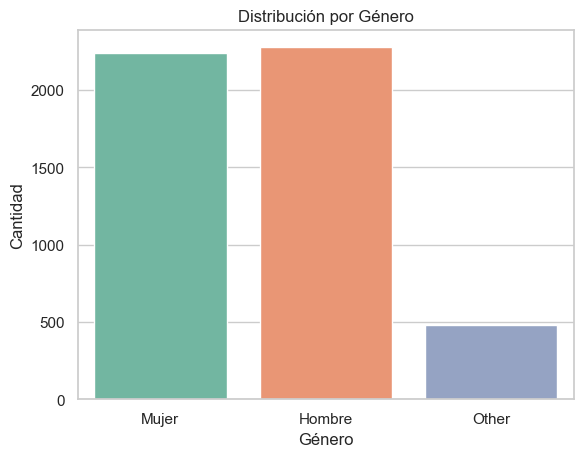

In [12]:
sns.countplot(data=df, x='gender', palette='Set2')
plt.title("Distribución por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()


### 📝 Explicación del código anterior
- Este bloque genera una gráfica de barras con `Seaborn` para mostrar la distribución de género en el dataset. Es útil para visualizar cuántos clientes hay de cada género y detectar posibles desbalances en la variable categórica.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Distribución de edad
</h3>


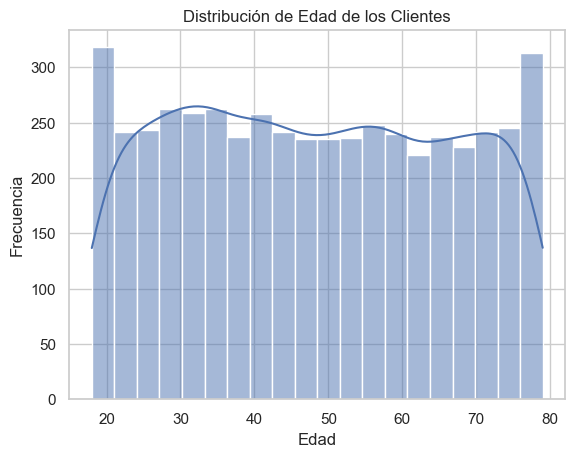

In [13]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribución de Edad de los Clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()



### 📝 Explicación del código anterior
- Este bloque genera un histograma con `Seaborn` para mostrar la distribución de edades de los clientes. El parámetro `kde=True` añade una curva de densidad para visualizar mejor la tendencia de los datos. Es útil para identificar grupos de edad predominantes y posibles sesgos en la muestra.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Clientes fraudulentos vs no fraudulentos
</h3>


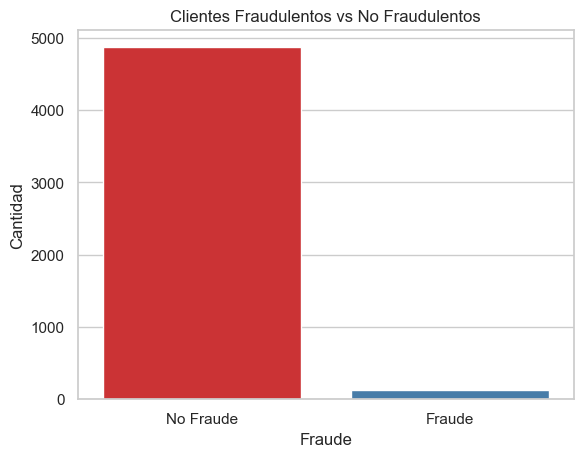

In [14]:
sns.countplot(data=df, x='is_fraudulent', palette='Set1')
plt.title("Clientes Fraudulentos vs No Fraudulentos")
plt.xticks([0, 1], ['No Fraude', 'Fraude'])
plt.xlabel("Fraude")
plt.ylabel("Cantidad")
plt.show()


### 📝 Explicación del código anterior
- Este bloque genera una gráfica de barras con `Seaborn` para mostrar la cantidad de clientes fraudulentos y no fraudulentos. El método `plt.xticks([0,1], ['Not Fraud', 'Fraud'])` cambia las etiquetas del eje X para que sean más descriptivas. Es útil para visualizar el balance de clases en el dataset.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Distribución de la puntuación de fidelidad
</h3>


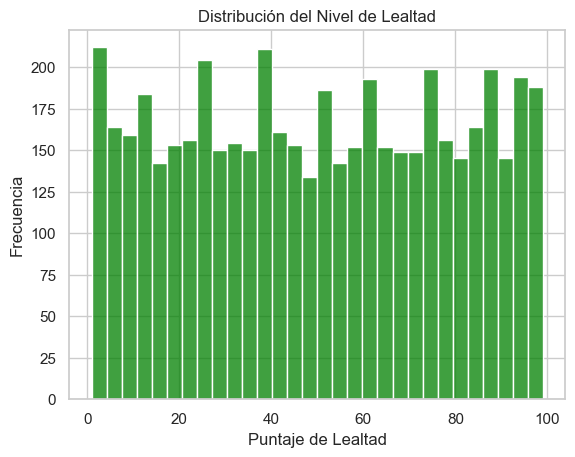

In [15]:
sns.histplot(df['loyalty_score'], bins=30, color='green')
plt.title("Distribución del Nivel de Lealtad")
plt.xlabel("Puntaje de Lealtad")
plt.ylabel("Frecuencia")
plt.show()



### 📝 Explicación del código anterior
- Este bloque genera un histograma con `Seaborn` para mostrar la distribución de la puntuación de fidelidad (`loyalty_score`) de los clientes. El parámetro `bins=30` divide los datos en 30 intervalos y el color verde mejora la visualización. Es útil para identificar cómo se distribuyen los niveles de fidelidad entre los clientes y detectar posibles agrupaciones o sesgos.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Distribución del riesgo de abandono
</h3>


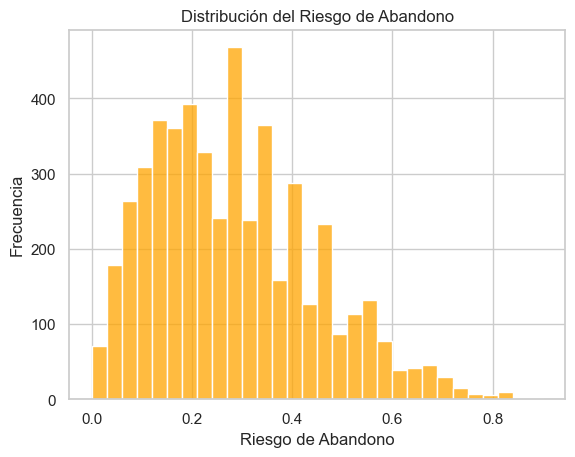

In [16]:
sns.histplot(df['churn_risk'], bins=30, color='orange')
plt.title("Distribución del Riesgo de Abandono")
plt.xlabel("Riesgo de Abandono")
plt.ylabel("Frecuencia")
plt.show()



### 📝 Explicación del código anterior
- Este bloque genera un histograma con `Seaborn` para mostrar la distribución del riesgo de abandono (`churn_risk`) de los clientes. El parámetro `bins=30` divide los datos en 30 intervalos y el color naranja facilita la visualización. Es útil para identificar cómo se distribuye el riesgo de abandono y detectar posibles grupos de clientes con mayor o menor propensión a abandonar.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Recuento de clientes por país
</h3>


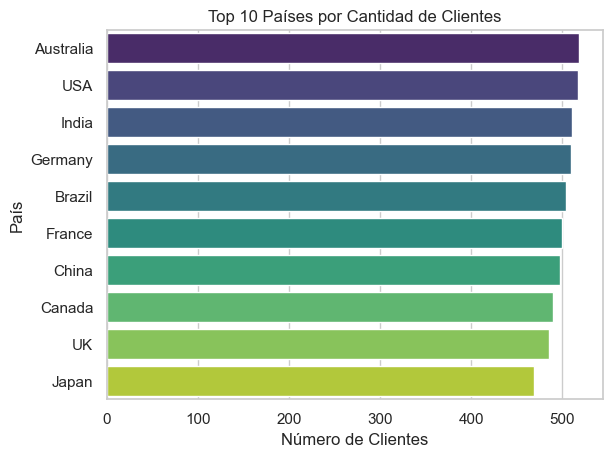

In [17]:
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Países por Cantidad de Clientes")
plt.xlabel("Número de Clientes")
plt.ylabel("País")
plt.show()



### 📝 Explicación del código anterior
- Este bloque calcula los 10 países con mayor cantidad de clientes (`top_countries`) y genera una gráfica de barras horizontales usando `Seaborn`. El eje X muestra el número de clientes y el eje Y los países. El parámetro `palette="viridis"` mejora la visualización con una paleta de colores atractiva. Es útil para identificar los mercados más grandes en el dataset.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Valores promedio del pedido vs puntuación de fidelidad
</h3>


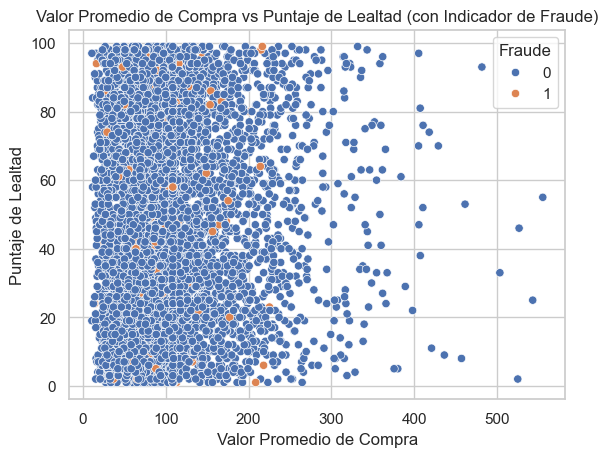

In [18]:
sns.scatterplot(data=df, x='avg_order_value', y='loyalty_score', hue='is_fraudulent')
plt.title("Valor Promedio de Compra vs Puntaje de Lealtad (con Indicador de Fraude)")
plt.xlabel("Valor Promedio de Compra")
plt.ylabel("Puntaje de Lealtad")
plt.legend(title="Fraude")
plt.show()



### 📝 Explicación del código anterior
- Este bloque genera un diagrama de dispersión (`scatterplot`) con `Seaborn` para visualizar la relación entre el valor promedio del pedido (`avg_order_value`) y la puntuación de fidelidad (`loyalty_score`). El parámetro `hue='is_fraudulent'` colorea los puntos según si el cliente es fraudulento o no, permitiendo identificar patrones o diferencias entre ambos grupos. Es útil para analizar si existe alguna relación entre el gasto promedio, la fidelidad y el fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Distribución de la tasa de apertura de correo electrónico
</h3>


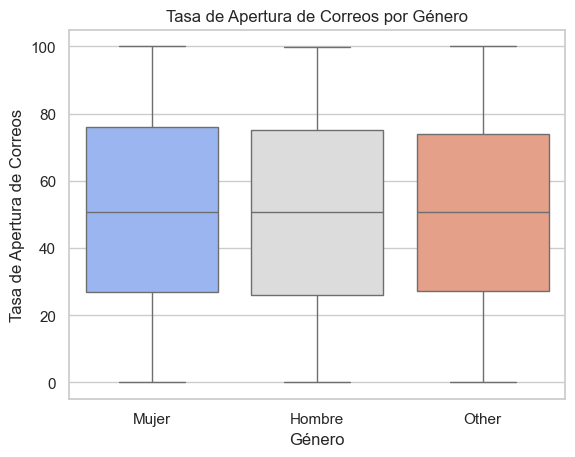

In [19]:
sns.boxplot(data=df, x='gender', y='email_open_rate', palette='coolwarm')
plt.title("Tasa de Apertura de Correos por Género")
plt.xlabel("Género")
plt.ylabel("Tasa de Apertura de Correos")
plt.show()

### 📝 Explicación del código anterior
- Este bloque genera un diagrama de caja (`boxplot`) con `Seaborn` para comparar la distribución de la tasa de apertura de correos electrónicos (`email_open_rate`) entre los diferentes géneros. El parámetro `palette='coolwarm'` aplica una paleta de colores que facilita la comparación visual. Es útil para identificar diferencias o patrones en el comportamiento de apertura de correos según el género.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Mapa de calor de correlación
</h3>


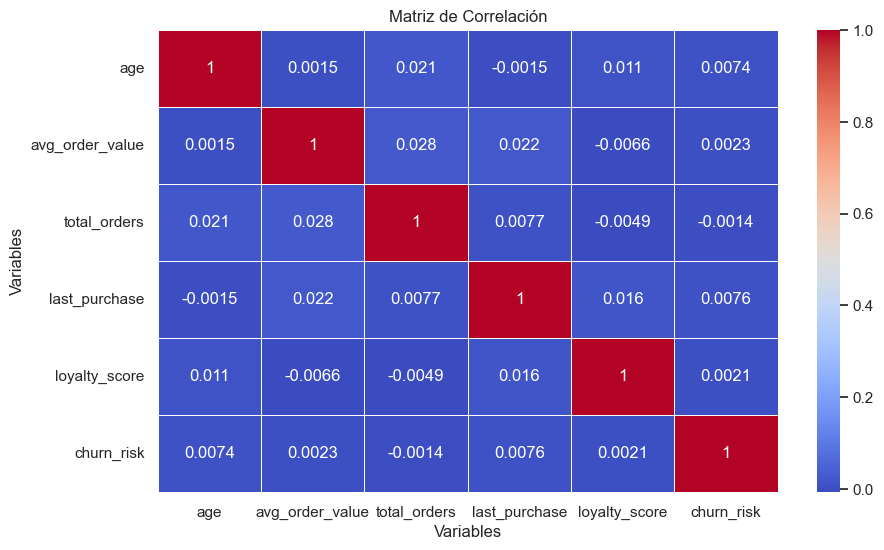

In [20]:
plt.figure(figsize=(10, 6))
corr = df[['age', 'avg_order_value', 'total_orders', 'last_purchase', 'loyalty_score', 'churn_risk']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()


### 📝 Explicación del código anterior
- Este bloque crea un mapa de calor de la matriz de correlación entre variables numéricas seleccionadas del dataset (`age`, `avg_order_value`, `total_orders`, `last_purchase`, `loyalty_score`, `churn_risk`). Utiliza `sns.heatmap` para visualizar gráficamente las correlaciones, donde los colores indican la fuerza y dirección de la relación entre variables. Es útil para identificar relaciones lineales fuertes (positivas o negativas) que pueden influir en el análisis o modelado.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Puntuación de fidelización vs. riesgo de abandono
</h3>


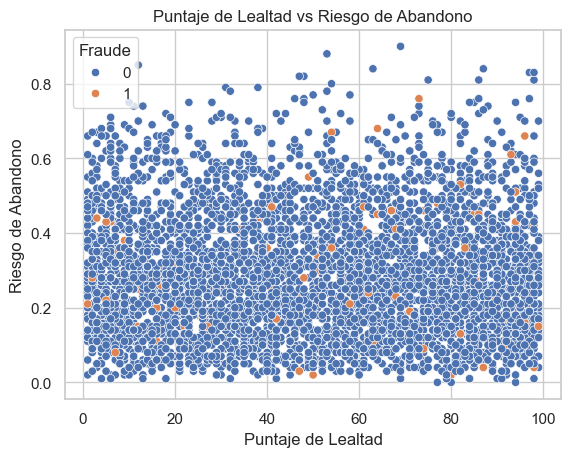

In [21]:
sns.scatterplot(data=df, x='loyalty_score', y='churn_risk', hue='is_fraudulent')
plt.title("Puntaje de Lealtad vs Riesgo de Abandono")
plt.xlabel("Puntaje de Lealtad")
plt.ylabel("Riesgo de Abandono")
plt.legend(title="Fraude")
plt.show()


### 📝 Explicación del código anterior
- Este bloque genera un diagrama de dispersión (`scatterplot`) con `Seaborn` para visualizar la relación entre la puntuación de fidelidad (`loyalty_score`) y el riesgo de abandono (`churn_risk`). El parámetro `hue='is_fraudulent'` colorea los puntos según si el cliente es fraudulento o no, permitiendo identificar patrones o diferencias entre ambos grupos. Es útil para analizar si existe alguna relación entre la fidelidad, el riesgo de abandono y el fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Categoría de producto preferida
</h3>


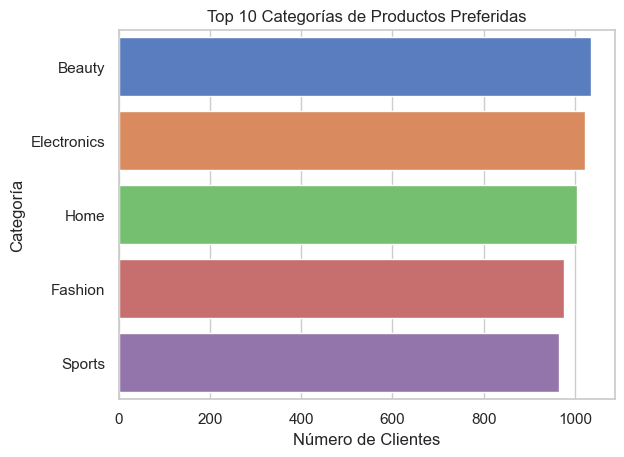

In [22]:
top_categories = df['preferred_category'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='muted')
plt.title("Top 10 Categorías de Productos Preferidas")
plt.xlabel("Número de Clientes")
plt.ylabel("Categoría")
plt.show()


### 📝 Explicación del código anterior
- Este bloque calcula las 10 categorías de producto preferidas por mayor cantidad de clientes (`top_categories`) y genera una gráfica de barras horizontales usando `Seaborn`. El eje X muestra el número de clientes y el eje Y las categorías. El parámetro `palette='muted'` aplica una paleta de colores suave para facilitar la visualización. Es útil para identificar los productos más populares entre los clientes.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Distribución total de pedidos
</h3>


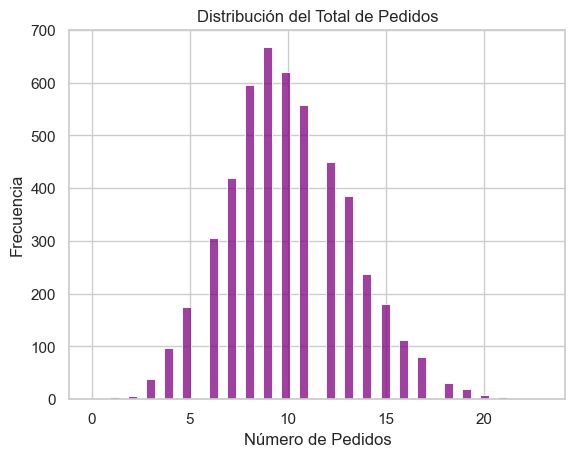

In [23]:
sns.histplot(df['total_orders'], bins=50, color='purple')
plt.title("Distribución del Total de Pedidos")
plt.xlabel("Número de Pedidos")
plt.ylabel("Frecuencia")
plt.show()


### 📝 Explicación del código anterior
- Este bloque genera un histograma con `Seaborn` para mostrar la distribución del número total de pedidos (`total_orders`) realizados por los clientes. El parámetro `bins=50` divide los datos en 50 intervalos y el color púrpura (`color='purple'`) mejora la visualización. Es útil para identificar la frecuencia de diferentes volúmenes de pedidos y detectar posibles grupos de clientes según su nivel de actividad.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Tiempo transcurrido desde que el cliente se unió
</h3>


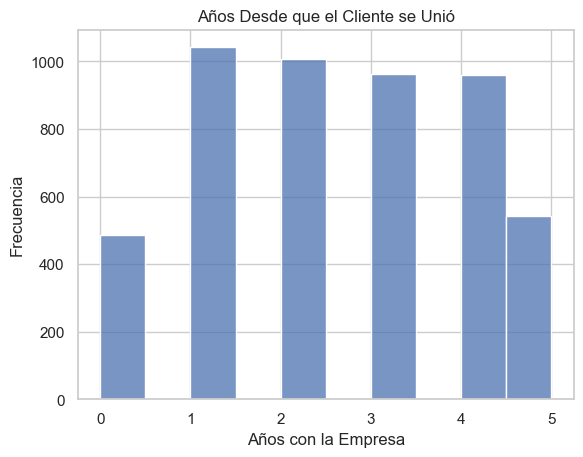

In [24]:
df['customer_since'] = pd.to_datetime(df['customer_since'])
df['years_with_company'] = datetime.now().year - df['customer_since'].dt.year

sns.histplot(df['years_with_company'], bins=10)
plt.title("Años Desde que el Cliente se Unió")
plt.xlabel("Años con la Empresa")
plt.ylabel("Frecuencia")
plt.show()


### 📝 Explicación del código anterior
- Este bloque convierte la columna `customer_since` a formato de fecha y calcula los años que cada cliente lleva con la empresa (`years_with_company`). Luego, genera un histograma con `Seaborn` para mostrar la distribución de antigüedad de los clientes. Es útil para visualizar cuántos clientes tienen diferentes niveles de antigüedad y detectar tendencias de retención.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Puntuación de fidelidad por país
</h3>


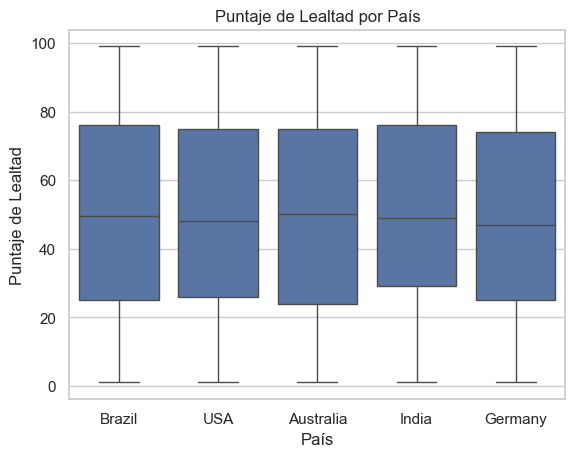

In [25]:
top_countries = df['country'].value_counts().nlargest(5).index
sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='loyalty_score')
plt.title("Puntaje de Lealtad por País")
plt.xlabel("País")
plt.ylabel("Puntaje de Lealtad")
plt.show()



### 📝 Explicación del código anterior
- Este bloque selecciona los 5 países con mayor cantidad de clientes (`top_countries`) y filtra el DataFrame para incluir solo esos países. Luego, genera un diagrama de caja (`boxplot`) con `Seaborn` para comparar la distribución de la puntuación de fidelidad (`loyalty_score`) entre estos países. Es útil para identificar diferencias en la fidelización de clientes según el país y detectar posibles outliers o patrones específicos por región.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Tasa de fraude por país
</h3>


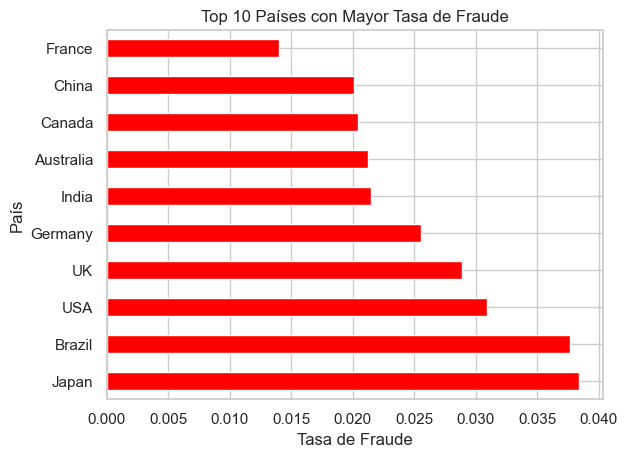

In [26]:
fraud_rate = df.groupby('country')['is_fraudulent'].mean().sort_values(ascending=False).head(10)
fraud_rate.plot(kind='barh', color='red')
plt.title("Top 10 Países con Mayor Tasa de Fraude")
plt.xlabel("Tasa de Fraude")
plt.ylabel("País")
plt.show()


### 📝 Explicación del código anterior
- Este bloque calcula la tasa promedio de fraude (`is_fraudulent`) por país usando `groupby` y `mean()`, luego ordena los países de mayor a menor tasa y selecciona los 10 principales. Después, genera una gráfica de barras horizontales (`barh`) en color rojo para visualizar los países con mayor proporción de clientes fraudulentos. Es útil para identificar regiones con mayor riesgo de fraude y orientar estrategias de prevención.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Preparación del conjunto de datos
</h3>


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### 📝 Explicación del código anterior
- Este bloque realiza una operación de análisis, limpieza o transformación de los datos. Es parte del flujo de preparación del dataset.

In [28]:
# Categorical encode (gender, preferred_category, country)
cat_cols = ['gender', 'preferred_category', 'country']
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

### 📝 Explicación del código anterior
- Este bloque realiza una operación de análisis, limpieza o transformación de los datos. Es parte del flujo de preparación del dataset.

In [29]:
# Target (binary classification): is_fraudulent
X = df_encoded.drop(['customer_id', 'is_fraudulent', 'customer_since'], axis=1)
y = df_encoded['is_fraudulent']

### 📝 Explicación del código anterior
- Este bloque realiza una operación de análisis, limpieza o transformación de los datos. Es parte del flujo de preparación del dataset.

In [30]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 📝 Explicación del código anterior
- Este bloque entrena un modelo de machine learning o realiza predicciones. Se usa `fit()` para entrenar y `predict()` para generar resultados sobre datos nuevos.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
10 modelos de clasificación
</h3>


In [31]:
from sklearn.metrics import accuracy_score, classification_report
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


### 📝 Explicación del código anterior
- Este bloque entrena un modelo de machine learning o realiza predicciones. Se usa `fit()` para entrenar y `predict()` para generar resultados sobre datos nuevos.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Logistic Regression
</h3>


In [35]:
from sklearn.linear_model import LogisticRegression
evaluate_model(LogisticRegression(), "Logistic Regression")



Logistic Regression Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el modelo de regresión logística (`LogisticRegression`) de `sklearn.linear_model` y luego evalúa su desempeño usando la función `evaluate_model`. El modelo se entrena con los datos de entrenamiento y se evalúa con los datos de prueba, mostrando métricas como exactitud, precisión, recall y F1-score. Es útil para comparar el rendimiento de este modelo con otros clasificadores en la detección de fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 K-Nearest Neighbors
</h3>


In [37]:
from sklearn.neighbors import KNeighborsClassifier
evaluate_model(KNeighborsClassifier(), "K-Nearest Neighbors")



K-Nearest Neighbors Accuracy: 0.9730
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador de vecinos más cercanos (`KNeighborsClassifier`) de `sklearn.neighbors` y evalúa su desempeño usando la función `evaluate_model`. El modelo KNN clasifica cada muestra según la mayoría de sus vecinos más cercanos en el espacio de características. Es útil para comparar su rendimiento con otros modelos en la detección de fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Support Vector Machine
</h3>


In [38]:
from sklearn.svm import SVC
evaluate_model(SVC(), "Support Vector Classifier")



Support Vector Classifier Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador de máquinas de soporte vectorial (`SVC`) de `sklearn.svm` y evalúa su desempeño usando la función `evaluate_model`. El modelo SVM busca encontrar el hiperplano que mejor separa las clases en el espacio de características. Es útil para comparar su rendimiento con otros modelos en la detección de fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Decision Tree
</h3>


In [39]:
from sklearn.tree import DecisionTreeClassifier
evaluate_model(DecisionTreeClassifier(), "Decision Tree")



Decision Tree Accuracy: 0.9410
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       974
           1       0.00      0.00      0.00        26

    accuracy                           0.94      1000
   macro avg       0.49      0.48      0.48      1000
weighted avg       0.95      0.94      0.94      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador de árbol de decisión (`DecisionTreeClassifier`) de `sklearn.tree` y evalúa su desempeño usando la función `evaluate_model`. El modelo de árbol de decisión clasifica los datos creando reglas basadas en las características más relevantes. Es útil para comparar su rendimiento con otros modelos en la detección de fraude y para interpretar visualmente cómo se toman las decisiones de clasificación.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Random Forest
</h3>


In [40]:
from sklearn.ensemble import RandomForestClassifier
evaluate_model(RandomForestClassifier(), "Random Forest")



Random Forest Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador de bosque aleatorio (`RandomForestClassifier`) de `sklearn.ensemble` y evalúa su desempeño usando la función `evaluate_model`. El modelo Random Forest combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. Es útil para comparar su rendimiento con otros modelos en la detección de fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 XGBoot
</h3>


In [41]:
from xgboost import XGBClassifier
evaluate_model(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), "XGBoost")



XGBoost Accuracy: 0.9730
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador XGBoost (`XGBClassifier`) del paquete `xgboost` y evalúa su desempeño usando la función `evaluate_model`. Se desactiva el uso del codificador de etiquetas (`use_label_encoder=False`) y se especifica la métrica de evaluación como `logloss`. XGBoost es un algoritmo de boosting eficiente y potente, ampliamente utilizado en competencias de ciencia de datos por su alto rendimiento en tareas de clasificación.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 Greadient Boosting
</h3>


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
evaluate_model(GradientBoostingClassifier(), "Gradient Boosting")



Gradient Boosting Accuracy: 0.9700
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador Gradient Boosting (`GradientBoostingClassifier`) de `sklearn.ensemble` y evalúa su desempeño usando la función `evaluate_model`. Gradient Boosting construye modelos secuenciales donde cada nuevo árbol corrige los errores del anterior, logrando alta precisión en tareas de clasificación. Es útil para comparar su rendimiento con otros modelos en la detección de fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
 AdaBoot
</h3>


In [43]:
from sklearn.ensemble import AdaBoostClassifier
evaluate_model(AdaBoostClassifier(), "AdaBoost")



AdaBoost Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador AdaBoost (`AdaBoostClassifier`) de `sklearn.ensemble` y evalúa su desempeño usando la función `evaluate_model`. AdaBoost combina varios clasificadores débiles (como árboles de decisión simples) y los pondera para mejorar la precisión general. Es útil para comparar su rendimiento con otros modelos en la detección de fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  Naive Bayes
</h3>


In [44]:
from sklearn.naive_bayes import GaussianNB
evaluate_model(GaussianNB(), "Naive Bayes")



Naive Bayes Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador Naive Bayes (`GaussianNB`) de `sklearn.naive_bayes` y evalúa su desempeño usando la función `evaluate_model`. Naive Bayes es un modelo probabilístico basado en el teorema de Bayes, ideal para clasificación rápida y eficiente, especialmente cuando las características son independientes entre sí. Es útil para comparar su rendimiento con otros modelos en la detección de fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  LightGBM
</h3>


In [45]:
from lightgbm import LGBMClassifier
evaluate_model(LGBMClassifier(), "LightGBM")


[LightGBM] [Info] Number of positive: 103, number of negative: 3897
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1080
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.025750 -> initscore=-3.633233
[LightGBM] [Info] Start training from score -3.633233

LightGBM Accuracy: 0.9740
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       974
           1       0.00      0.00      0.00        26

    accuracy                           0.97      1000
   macro avg       0.49      0.50      0.49      1000
weighted avg       0.95      0.97      0.96      1000



### 📝 Explicación del código anterior
- Este bloque importa el clasificador LightGBM (`LGBMClassifier`) del paquete `lightgbm` y evalúa su desempeño usando la función `evaluate_model`. LightGBM es un algoritmo de boosting eficiente y rápido, especialmente diseñado para manejar grandes volúmenes de datos y muchas características. Es útil para comparar su rendimiento con otros modelos en la detección de fraude.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
Modelos de agrupación
</h3>


In [46]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

clust_features = ['avg_order_value', 'total_orders', 'loyalty_score', 'email_open_rate', 'churn_risk']
X_clust = df[clust_features].copy()
X_clust_scaled = StandardScaler().fit_transform(X_clust)

# 2D visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clust_scaled)


### 📝 Explicación del código anterior
Este bloque importa los modelos de clustering y herramientas de visualización, selecciona características relevantes para segmentar clientes, escala los datos y reduce la dimensionalidad a 2 componentes principales con PCA para facilitar la visualización de los clústeres.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  KMeans Clustering
</h3>


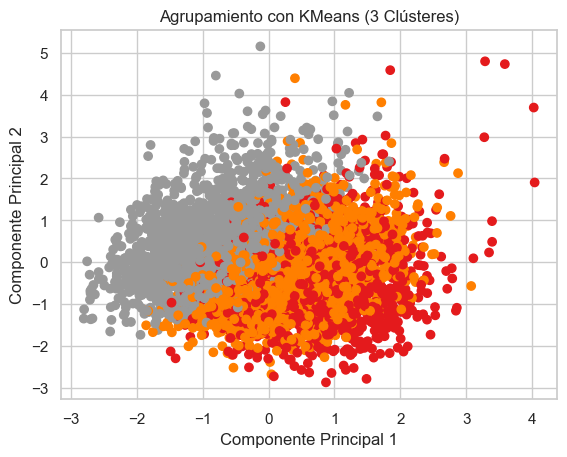

In [47]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X_clust_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['kmeans_cluster'], cmap='Set1')
plt.title("Agrupamiento con KMeans (3 Clústeres)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


### 📝 Explicación del código anterior
- Este bloque aplica el algoritmo KMeans (KMeans) para segmentar a los clientes en 3 clústeres usando las variables seleccionadas. Asigna la etiqueta de clúster a cada cliente en la columna kmeans_cluster y visualiza los resultados en 2D usando PCA, donde cada color representa un clúster diferente. Es útil para identificar patrones y grupos de clientes con características similares.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  DBSCAN Clustering
</h3>


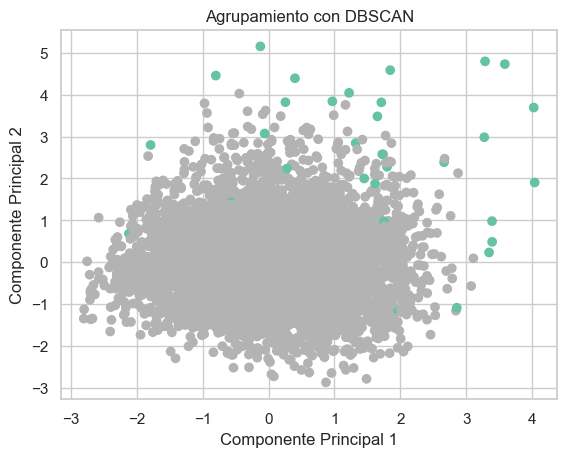

In [48]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_clust_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['dbscan_cluster'], cmap='Set2')
plt.title("Agrupamiento con DBSCAN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


### 📝 Explicación del código anterior
- Este bloque aplica el algoritmo DBSCAN (DBSCAN) para segmentar a los clientes según la densidad de puntos en el espacio de características. Asigna la etiqueta de clúster a cada cliente en la columna dbscan_cluster y visualiza los resultados en 2D usando PCA, donde cada color representa un clúster diferente. Es útil para identificar grupos de clientes con comportamientos similares y detectar posibles anomalías o clientes atípicos.

<h3 style="
    color: white; 
    text-align: center; 
    background-color: #3498db; 
    border-radius: 10px;
    padding: 10px;">
  Hierarchical Clustering
</h3>


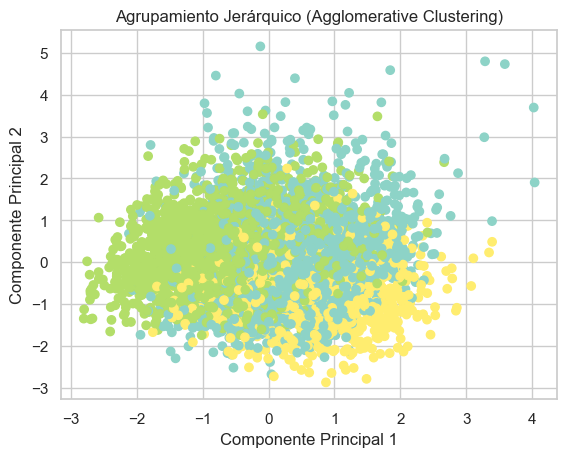

In [49]:
agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(X_clust_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['agglo_cluster'], cmap='Set3')
plt.title("Agrupamiento Jerárquico (Agglomerative Clustering)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


### 📝 Explicación del código anterior
- Este bloque aplica el algoritmo de agrupamiento jerárquico aglomerativo (AgglomerativeClustering) para segmentar a los clientes en 3 clústeres. Asigna la etiqueta de clúster a cada cliente en la columna agglo_cluster y visualiza los resultados en 2D usando PCA, donde cada color representa un clúster diferente. Es útil para analizar las relaciones jerárquicas entre grupos de clientes y descubrir patrones de comportamiento similares.

<h2 style="
    color: white; 
    text-align: center; 
    background-color: #000000ff; 
    border-radius: 10px;
    padding: 10px;">

📄 **Conclusión**

</h2>

Este análisis permitió explorar de manera integral un conjunto de datos simulados de clientes en un entorno de comercio electrónico. A través del uso de técnicas de aprendizaje automático supervisado e insupervisado, se logró identificar patrones relevantes como el riesgo de fraude, la probabilidad de abandono y la segmentación de perfiles de clientes. Las visualizaciones ayudaron a comprender mejor la composición demográfica y el comportamiento de los usuarios, mientras que los modelos de clustering aportaron valor para futuras estrategias de marketing personalizado. En conjunto, este proyecto demuestra cómo la ciencia de datos puede transformar información cruda en conocimiento útil para la toma de decisiones empresariales.